# Lesson 3: Doublet

The further away from the source and sink that you are, the closer they look together. Eventually, the effective distance between them is zero. The other streamlines will start looking like circles, tangent at the origion. The pattern seen is called a doublet. 

I'm having a difficult time picturing this, so I'm really looking forward to the visualization this lesson will have to offer. :)

In [1]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline

In [2]:
n = 50

xa,xz = -2,2
ya,yz = -1,1

x = numpy.linspace(xa,xz,n)
y = numpy.linspace(ya,yz,n)

X,Y = numpy.meshgrid(x,y)

In [3]:
k = 1.0
x_dub,y_dub = 0,0

In [4]:
def getveldub(strength,xd,yd,X,Y):
    """
    Returns the vel field produced by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of doublet
    xd: float
        x-coordinate of the doublet
    yd: float
        y-coordinate of the doublet
    X: 2D numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def getstreamfuncdub(strength,xd,yd,X,Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [5]:
# compute vel field
u_dub, v_dub = getveldub(k,x_dub,y_dub,X,Y)
# compute stream-func
psi_dub = getstreamfuncdub(k,x_dub,y_dub,X,Y)

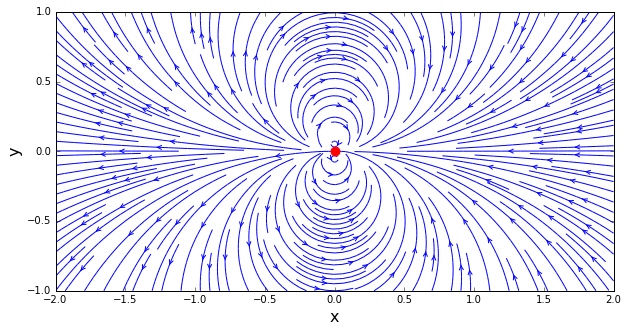

In [7]:
# plot dat streamline gurl
size = 10
pyplot.figure(figsize=(size, (yz-ya)/(xz-xa)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xa,xz)
pyplot.ylim(ya,yz)
pyplot.streamplot(X,Y,u_dub,v_dub,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(x_dub,y_dub,color='red',s=80,marker='o')

In [9]:
u_inf = 1.0
u_fs = u_inf * numpy.ones((n, n), dtype=float)
v_fs = u_inf * numpy.zeros((n, n), dtype=float)

psi_fs = u_inf * Y

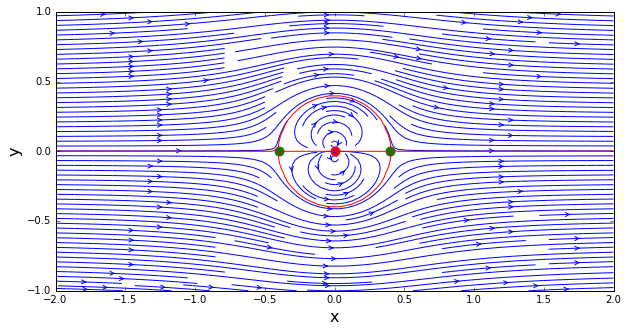

In [13]:
# superposition
u = u_fs + u_dub
v = v_fs + v_dub
psi = psi_fs + psi_dub

# plot streamlines
size = 10
pyplot.figure(figsize=(size, (yz-ya)/(xz-xa)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xa,xz)
pyplot.ylim(ya,yz)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.contour(X,Y,psi,levels=[0], colors='red',linewidth=2,linestyles='solid')
pyplot.scatter(x_dub,y_dub,color='red',s=80,marker='o')

# calculate stagnation points
x_stagn1, y_stagn1 = +math.sqrt(k/(2*math.pi*u_inf)),0
x_stagn2, y_stagn2 = -x_stagn1,0

# display stag points
pyplot.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='g',s=80,marker='o')

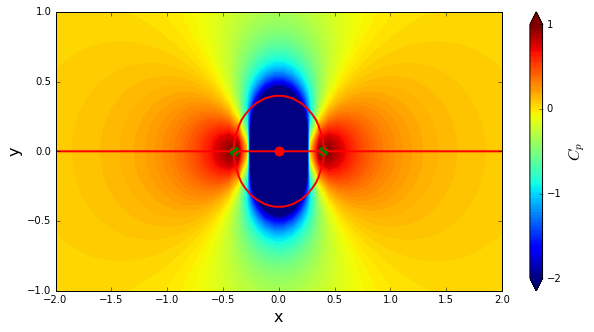

In [15]:
# compute pressure coeff field
cp = 1.0 - (u**2 + v**2)/u_inf**2

# plot the pressure coeff field
size = 10
pyplot.figure(figsize=(size, (yz-ya)/(xz-xa)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xa,xz)
pyplot.ylim(ya,yz)
contf=pyplot.contourf(X,Y,cp,levels=numpy.linspace(-2,1,100),extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_dub,y_dub,color='red',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0],colors='red',linewidths=2,linestyles='solid')
pyplot.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='g',s=80,marker='o')
